## Softmax

In [ ]:
import numpy as np

In [19]:
vector = np.array([11231, 999, 123142])

In [28]:
vector = np.array([-10, 10, 24])

In [33]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [32]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [ ]:
# clean.py 
# 维基百科语料 --> 一个句子一行，再通过jieba分词，保存到sentences.pk
from gensim.test.utils import common_texts,get_tmpfile
from gensim.models import Phrases,Word2Vec
import numpy as np
import re
import jieba
from gensim.models import word2vec
import logging
from opencc import OpenCC
import os

cc = OpenCC('t2s') #繁体字转简体字

def token(string):
    return re.findall('\w+',string)

def cut(string):
    return list(jieba.cut(''.join(token(str(string)))))

# 将wiki语料库中的所有文件完整路径保存到files中
files = []
for root,dirs,filename in os.walk(os.getcwd()+'/wiki_articles'):
    for f in filename:
        if f.startswith('wiki'):
            files.append(root+'/'+f)

sentence = open('/Users/zhengjiali/Documents/nlp/nlp/lesson04/Sentences_simple.pk','w')
for fname in files:
    with open(fname) as f:
        for line in f:
            line = cc.convert(line) #繁体字转简体字
            for l in re.split('。|？|！',line):
                tmp = cut(l)
                if len(tmp)<3:continue
                sentence.write(' '.join(tmp)+'\n')

sentence.close()

In [ ]:
# train.py
# 训练模型，并保存

from gensim.test.utils import get_tmpfile
from gensim.models import word2vec,word2vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

mymodel_path = get_tmpfile('word2vec.model')
mywv_path = get_tmpfile('wordvectors.kv')

f = open('/Users/zhengjiali/Documents/nlp/nlp/lesson04/Sentences.pk','r')
sentences = word2vec.LineSentence(f)
model = Word2Vec(sentences,min_count=1,workers=4)
f.close()
model.save(mymodel_path)
word_vectors = model.wv
word_vectors.save(mywv_path)

In [1]:
# 在百度ai studio训练好后，下载模型
from gensim.models import Word2Vec
model = Word2Vec.load('work/word2vec.model')

In [20]:
model.wv.most_similar('崇拜')

[('崇敬', 0.7898735404014587),
 ('敬拜', 0.7664703726768494),
 ('尊崇', 0.7493586540222168),
 ('敬畏', 0.7387300133705139),
 ('尊敬', 0.7192584276199341),
 ('信仰', 0.7184967398643494),
 ('敬奉', 0.7172931432723999),
 ('敬仰', 0.7163410186767578),
 ('膜拜', 0.6791212558746338),
 ('异教', 0.6776829957962036)]

In [19]:
model.wv.most_similar('祈祷')

[('祷告', 0.9239811897277832),
 ('敬拜', 0.850999116897583),
 ('诵经', 0.7799026370048523),
 ('默想', 0.7619050741195679),
 ('忏悔', 0.7578786015510559),
 ('礼拜', 0.7530680894851685),
 ('诵念', 0.7491012811660767),
 ('念经', 0.7422826290130615),
 ('讲道', 0.7388753890991211),
 ('膜拜', 0.7317661643028259)]

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 由于数据量太大，全量显示处理起来太慢，所以选择了个别单词来显示
wordslist = ['经常','祷告','祈祷','常常','时常','忏悔','膜拜','信仰','崇拜','崇敬','敬拜','异教','敬畏',
             '阴险','狡诈','狠毒','心狠手辣', '狡猾', '奸诈', '懦弱', '贪财', '多疑', '狂妄', '凶残',
            '妄自菲薄','妄自菲薄','小人','奸诈','无赖','美好','幸福','灿烂','难忘','快乐','麻木不仁',
            '自私自利','语言','语法','口语','思考','思索','反思','思维','探究','理性','探讨','想像', 
             '理解', '解构','思绪','思念','不舍', '悲伤','哀伤','之情','眷恋', '怀念','牵挂','忧伤', 
             '思乡', '伤心','电脑','计算机','背包','行李箱']
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in wordslist:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


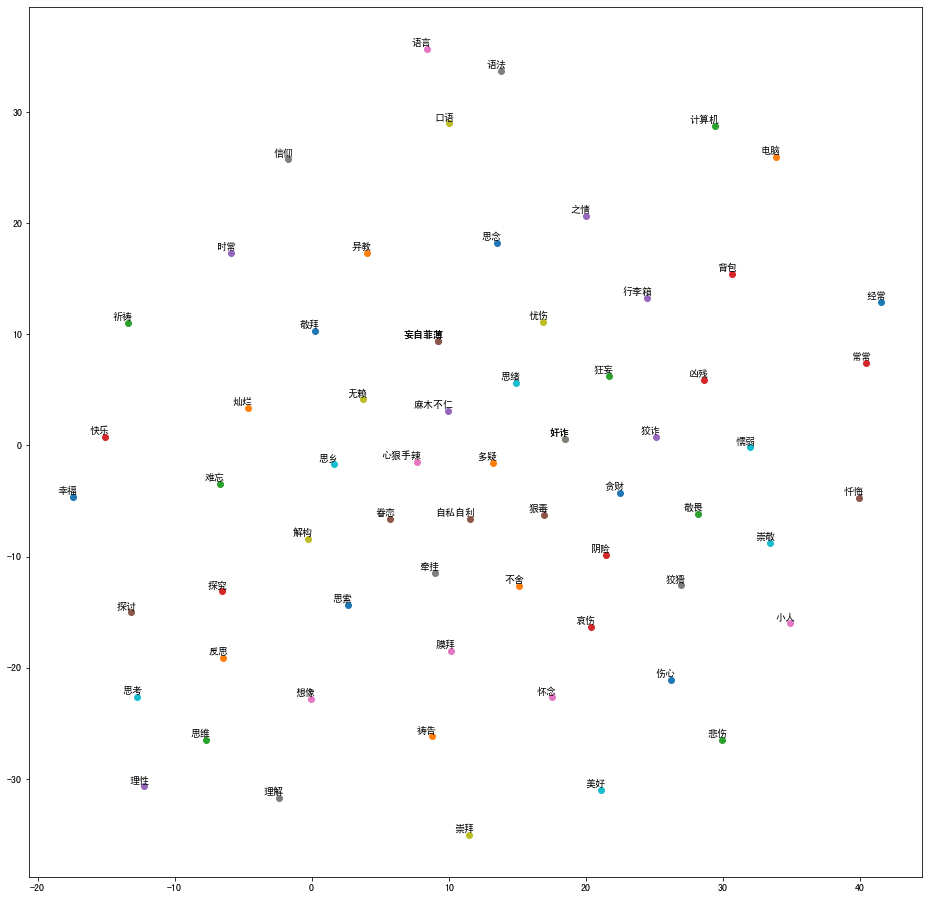

In [18]:
tsne_plot(model)